In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [34]:
data_dir = '/Users/ec270266/Documents/Phd/Euclid/dev/feature-sed-pred/sed_spectral_classification/output/psf_dataset/'
wf_psf_dir = '/Users/ec270266/Documents/Phd/Euclid/dev/wf-psf/'

# SED folder path
SED_path = wf_psf_dir+'data/SEDs/save_SEDs/'

# Load the datasets
dataset = np.load(data_dir + 'train_100_stars_id_001_8bins.npy', allow_pickle=True)[()]
dataset.keys()


dict_keys(['stars', 'noisy_stars', 'mono_psfs', 'positions', 'SEDs', 'zernike_coef', 'C_poly', 'parameters', 'SED_ids', 'SNR'])

In [36]:
SEDs = np.load(SED_path + 'SEDs.npy', allow_pickle=True)[()]
SEDs.shape

(13, 350)

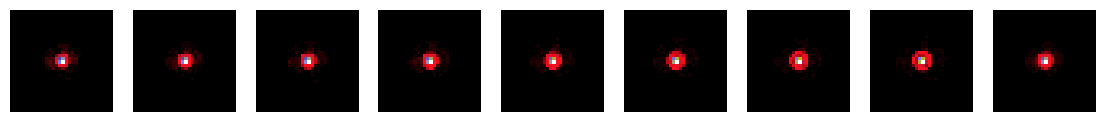

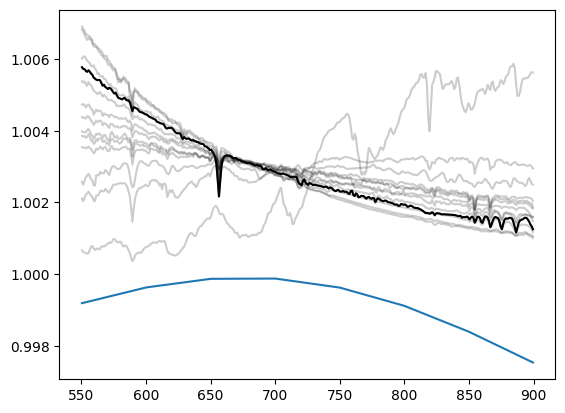

In [48]:
idx = 1
# plot monoc psfs and the poly psf
im, ax = plt.subplots(1, dataset['parameters']['n_bins']+1, figsize=(14, 7))

for i in range(dataset['parameters']['n_bins']):
    ax[i].imshow(dataset['mono_psfs'][idx,i], cmap='gist_stern')
    ax[i].axis('off')

ax[-1].imshow(dataset['stars'][idx], cmap='gist_stern')
ax[-1].axis('off')
plt.show()

# Plot the difference between the mono and poly psfs
lambdas = np.linspace(dataset['SEDs'][idx][0,0], dataset['SEDs'][idx][-1,0], dataset['parameters']['n_bins'])
diff = np.array([np.sum((mono_psf-dataset['stars'][idx])**2) for mono_psf in dataset['mono_psfs'][idx]])
plt.plot(lambdas,1-diff)
# Load and plot all the SEDs
SEDs = np.load(SED_path + 'SEDs.npy', allow_pickle=True)[()]
for sed in SEDs:
    plt.plot(dataset['SEDs'][idx][:,0], 1+sed, 'k', alpha=0.2)
# Plot the SED
plt.plot(dataset['SEDs'][idx][:,0], 1+dataset['SEDs'][idx][:,1], 'k')

plt.show()

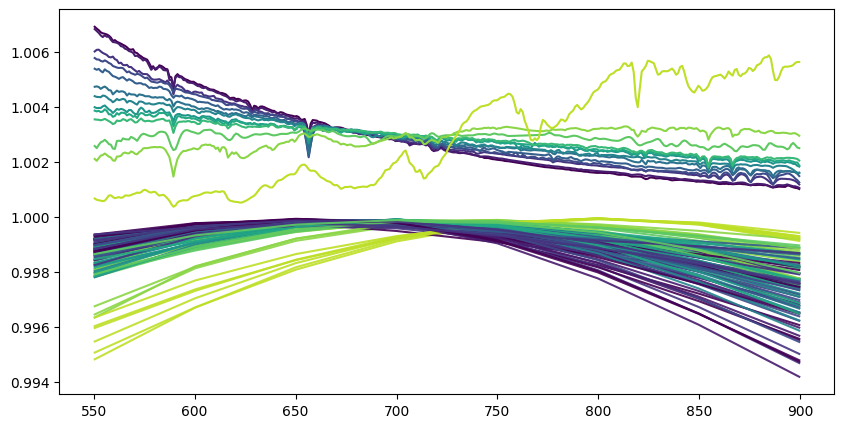

In [68]:
# Define 13 color palette
color_palette = plt.cm.viridis(np.linspace(0, 0.9, 13))

# Plot the difference with color code
plt.figure(figsize=(10, 5))

for i in range(dataset['parameters']['n_stars']):
    diff = np.array([np.sum((mono_psf-dataset['stars'][i])**2) for mono_psf in dataset['mono_psfs'][i]])
    plt.plot(lambdas,1-diff, color=color_palette[dataset['SED_ids'][i]], alpha=0.9)

# Plot the SEDs
for i in range(13):
    plt.plot(dataset['SEDs'][0][:,0], 1+SEDs[i], color=color_palette[i])